### Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from mpl_toolkits.mplot3d import Axes3D

### Load Dataset

In [2]:
data=pd.read_csv('odd.csv')

### Visualize Data

In [3]:
data.head()

,Year,Mileage,Condition,Price
0,2022,18107,Excellent,19094.75
1,2014,13578,Excellent,27321.10
2,2016,46054,Good,23697.30
3,2022,34981,Excellent,18251.05
4,2019,63565,Excellent,19821.85


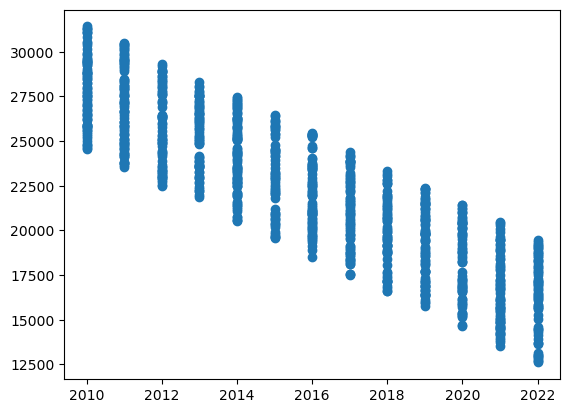

In [45]:
#Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Year.values, y=data.Price.values)
plt.show()

### Check for Missing Values

In [46]:
###Check for Missing Data###
data.isna().sum()

Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

### Perform Minmax Scaling

In [47]:

min_price=data['Price'].min()
max_price=data['Price'].max()

In [48]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [49]:
data['Price']=minmax_scaling(data,'Price')
data['Mileage']=minmax_scaling(data,'Mileage')

In [51]:
unique_year=data['Year'].nunique()

In [52]:
unique_year

13

In [53]:
unique_con=data['Condition'].nunique()
unique_con

3

In [54]:
data=pd.get_dummies(data, columns=['Year','Condition'],dtype=float,drop_first=True)

In [55]:
zeros=data[data['Price']==0]
zeros

,Mileage,Price,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good
486,0.985313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
zeros=data[data['Mileage']==0]
zeros

,Mileage,Price,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good
213,0.0,0.951135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
data=data[data['Price']!=0.0]

In [58]:
data=data[data['Mileage']!=0.0]

In [59]:
data.shape

(998, 16)

### Divide Data into Training and Testing

In [60]:
data.head()

,Mileage,Price,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good
0,0.057460,0.344739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.025044,0.782267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.257488,0.589531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.178234,0.299866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.382822,0.383411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [62]:
data['ones']=np.ones(data.shape[0])

In [63]:
data.head()

,Mileage,Price,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good,ones
0,0.057460,0.344739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.025044,0.782267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.257488,0.589531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.178234,0.299866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.382822,0.383411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
train,test=train_test_split(data,0.2)

x_train=train.drop('Price', axis=1)
x_test=test.drop('Price', axis=1)
y_train=train['Price']
y_test=test['Price']

In [65]:
x_train.shape

(799, 16)

In [66]:
y_train.shape

(799,)

In [67]:
x_test.shape

(199, 16)

In [68]:
y_test.shape

(199,)

In [69]:
x_train

,Mileage,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good,ones
561,0.103124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
826,0.664546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
838,0.170426,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266,0.896446,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
136,0.598468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.137322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
640,0.749877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
892,0.920273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
580,0.552911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [70]:
y_train

561    0.700076
826    0.704227
838    0.728256
266    0.511693
136    0.516033
         ...   
871    0.846928
640    0.725709
892    0.556026
580    0.586140
199    0.216308
Name: Price, Length: 799, dtype: float64

In [71]:
x_test

,Mileage,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good,ones
952,0.881180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
222,0.711849,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
572,0.870443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101,0.249121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
862,0.616054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.724582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
197,0.183073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
51,0.215861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259,0.456687,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
y_test

952    0.410982
222    0.367529
572    0.680913
101    0.273528
862    0.349941
         ...   
135    0.735107
197    0.404441
51     0.498630
259    0.621897
402    0.323941
Name: Price, Length: 199, dtype: float64

### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [73]:
transposed = x_train.T
c=transposed @ x_train
theta = np.linalg.inv(c)
b=transposed@y_train.values
theta=theta@b
theta

array([-3.71545109e-01, -5.31867329e-02, -1.06372016e-01, -1.59558978e-01,
       -2.12744555e-01, -2.65929906e-01, -3.19116336e-01, -3.72302191e-01,
       -4.25488649e-01, -4.78674819e-01, -5.31861473e-01, -5.85047219e-01,
       -6.38233281e-01,  3.68830506e-07, -5.03633961e-07,  1.00431894e+00])

### Calculate Predictions on Test Set

In [74]:
y_pred_normal_eq=x_test@theta

In [75]:
y_pred_normal_eq

952    0.410991
222    0.367533
572    0.680910
101    0.273526
862    0.349938
         ...   
135    0.735103
197    0.404438
51     0.498628
259    0.621895
402    0.323938
Length: 199, dtype: float64

In [28]:
###Calculate predictions on X_test using theta###

### Calculate MSE (Evaluate Model)

In [76]:
###Evaluate the regression model based on Mean Squared Error###
y_t = np.array(y_test)
y_p = np.array(y_pred_normal_eq)
n = len(y_test)
mse = (1 / (2 * n)) * np.sum((y_p - y_t) ** 2)
mse

5.496021277818872e-12

### Inverse Transform Model's Output

In [78]:
###Transform model's output back to original range/scale###
y_pred_normal_eq=(y_pred_normal_eq*(max_price-min_price))+min_price
y_pred_normal_eq

952    20340.403707
222    19523.312790
572    25415.400724
101    17755.804875
862    19192.506718
           ...     
135    26434.341837
197    20217.204167
51     21988.158314
259    24305.800529
402    18703.655416
Length: 199, dtype: float64

### Calcualte Weights Using Gradient Descent

In [79]:
x_train

,Mileage,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Condition_Fair,Condition_Good,ones
561,0.103124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
826,0.664546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
838,0.170426,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266,0.896446,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
136,0.598468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.137322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
640,0.749877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
892,0.920273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
580,0.552911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [80]:
y_train

561    0.700076
826    0.704227
838    0.728256
266    0.511693
136    0.516033
         ...   
871    0.846928
640    0.725709
892    0.556026
580    0.586140
199    0.216308
Name: Price, Length: 799, dtype: float64

In [ ]:
n=y_train.shape[0]
features=x_train.shape[1]
y_t=y_train.values.reshape(-1,1)
theta_gd=np.zeros((features,1))

alpha=0.01
epochs=100
n=x_train.shape[0]

for i in range(epochs):
    pred=x_train@theta
    error=pred-y_t
    gradients=(1/n)*x_train.T@error
    theta_gd=theta_gd-(alpha*gradients)

theta_gd

,0
Mileage,0.028855
Year_2011,0.034096
Year_2012,0.021882
Year_2013,0.019946
Year_2014,0.020081
Year_2015,0.011227
Year_2016,0.009028
Year_2017,0.005830
Year_2018,0.001597
Year_2019,-0.002020


### Calculate Predictions on Test Test

In [ ]:
theta_gd

,0
Mileage,0.103507
Year_2011,0.049737
Year_2012,0.032260
Year_2013,0.030245
Year_2014,0.034218
Year_2015,0.020162
Year_2016,0.020401
Year_2017,0.017108
Year_2018,0.011561
Year_2019,0.010255


In [88]:
###Calculate y_pred on weights from GD###
y_pred_gd=x_test@theta_gd

In [89]:
y_pred_gd

,0
952,0.196040
222,0.161943
572,0.160690
101,0.131795
862,0.154947
...,...
135,0.180294
197,0.152438
51,0.143399
259,0.168832


### Calculate MSE (Evaluate Model)

In [90]:
###Calculate MSE on y_pred from GD###

y_t = np.array(y_test)
y_p = np.array(y_pred_gd)
n = len(y_test)
mse_gd = (1 / (2 * n)) * np.sum((y_p - y_t) ** 2)
mse_gd

16.699853829281878

### Compare the two Approaches based on MSE ###

In [40]:
###Which approach is more accurate?###
###Which approach is fast###?

normal equation method is more accurate since the mse of y_pred calculated through normal equation is much less than that calculated through gradient descent

normal equation method is faster since it only involves mathematical calculations which occur in o(1) but in batch gradient descent runs in o(epochs)

In [42]:
print(type(x_test))
print(x_test)

<class 'pandas.core.frame.DataFrame'>
     Bedrooms      Area  ones
170         3  0.206798   1.0
938         3  0.073301   1.0
201         4  0.336609   1.0
1           2  0.052007   1.0
323         3  0.189189   1.0
..        ...       ...   ...
832         4  0.116298   1.0
686         4  0.242015   1.0
688         4  0.287060   1.0
724         2  0.035627   1.0
17          3  0.044636   1.0

[178 rows x 3 columns]


In [43]:
x_test = x_test.values  # or x_test.to_numpy()

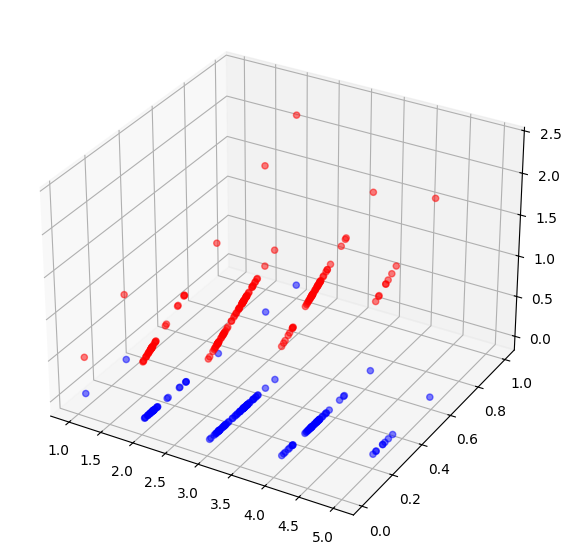

In [44]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted data points (optional)
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred_normal_eq, color='red', label='Predicted', alpha=0.5)